In [1]:
from src import UnidecInterface,make_output_folder,SpectraExtractor,get_likely_composition,get_all_differences, get_neighbour_diffs, get_stoichiometries
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import seaborn as sns

In [2]:
load_file=r"C:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenbach\Data\Proteasome\20241023_PA28-Inhibitors\PA28ab_DMSO\20241023_PA28ab_DMSO2_1.RAW"
output_folder="PA28ab_DMSO_1"

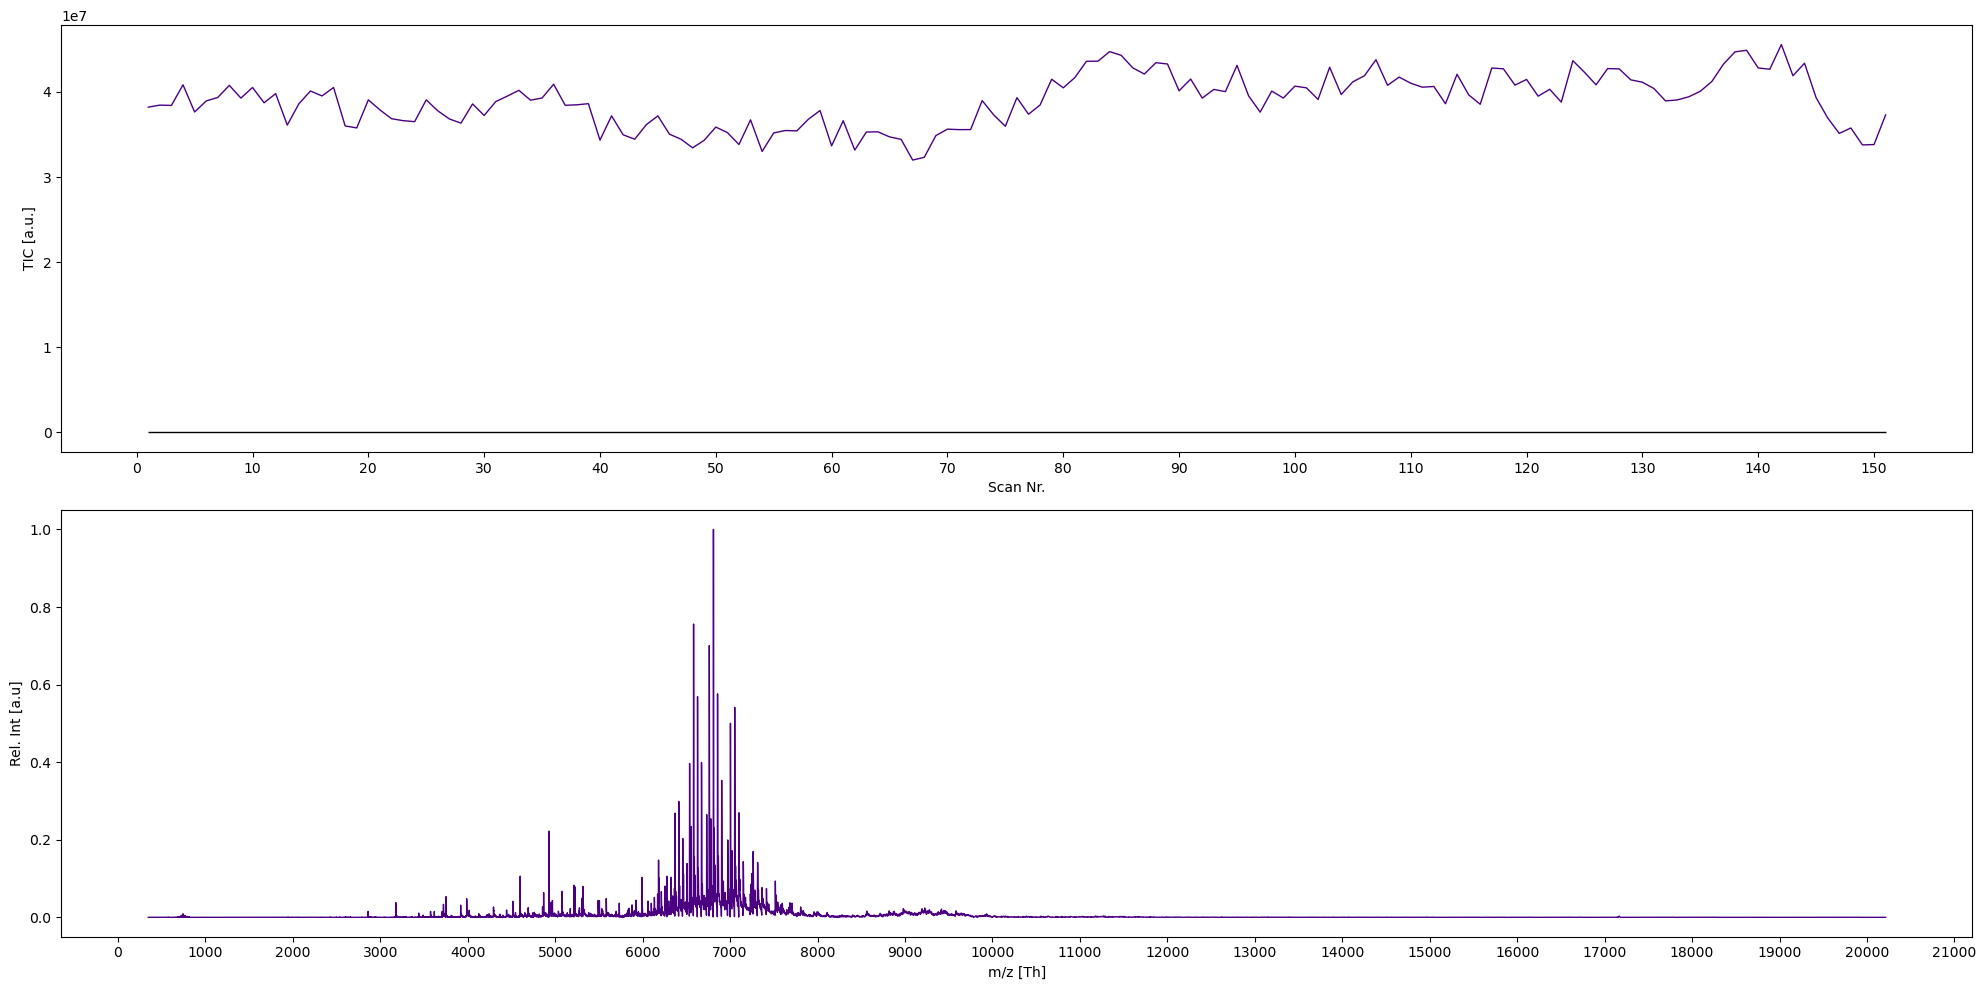

In [3]:
extractor=SpectraExtractor(load_file)

extractor.get_average_spec(
    range=None
)

fig1,ax=plt.subplots(2,1, figsize=(20,10))
extractor.plot_chromatogram(plot_time=False,ax=ax[0])
extractor.plot_spectrum(zoom=None,ax=ax[1])
fig1.tight_layout()


In [4]:
folder=make_output_folder(
    data_in=load_file,
    folder_name=output_folder
)
fig1.savefig(f"{folder}/spectrum_wide.png",dpi=300)
extractor.save_spectrum(folder)

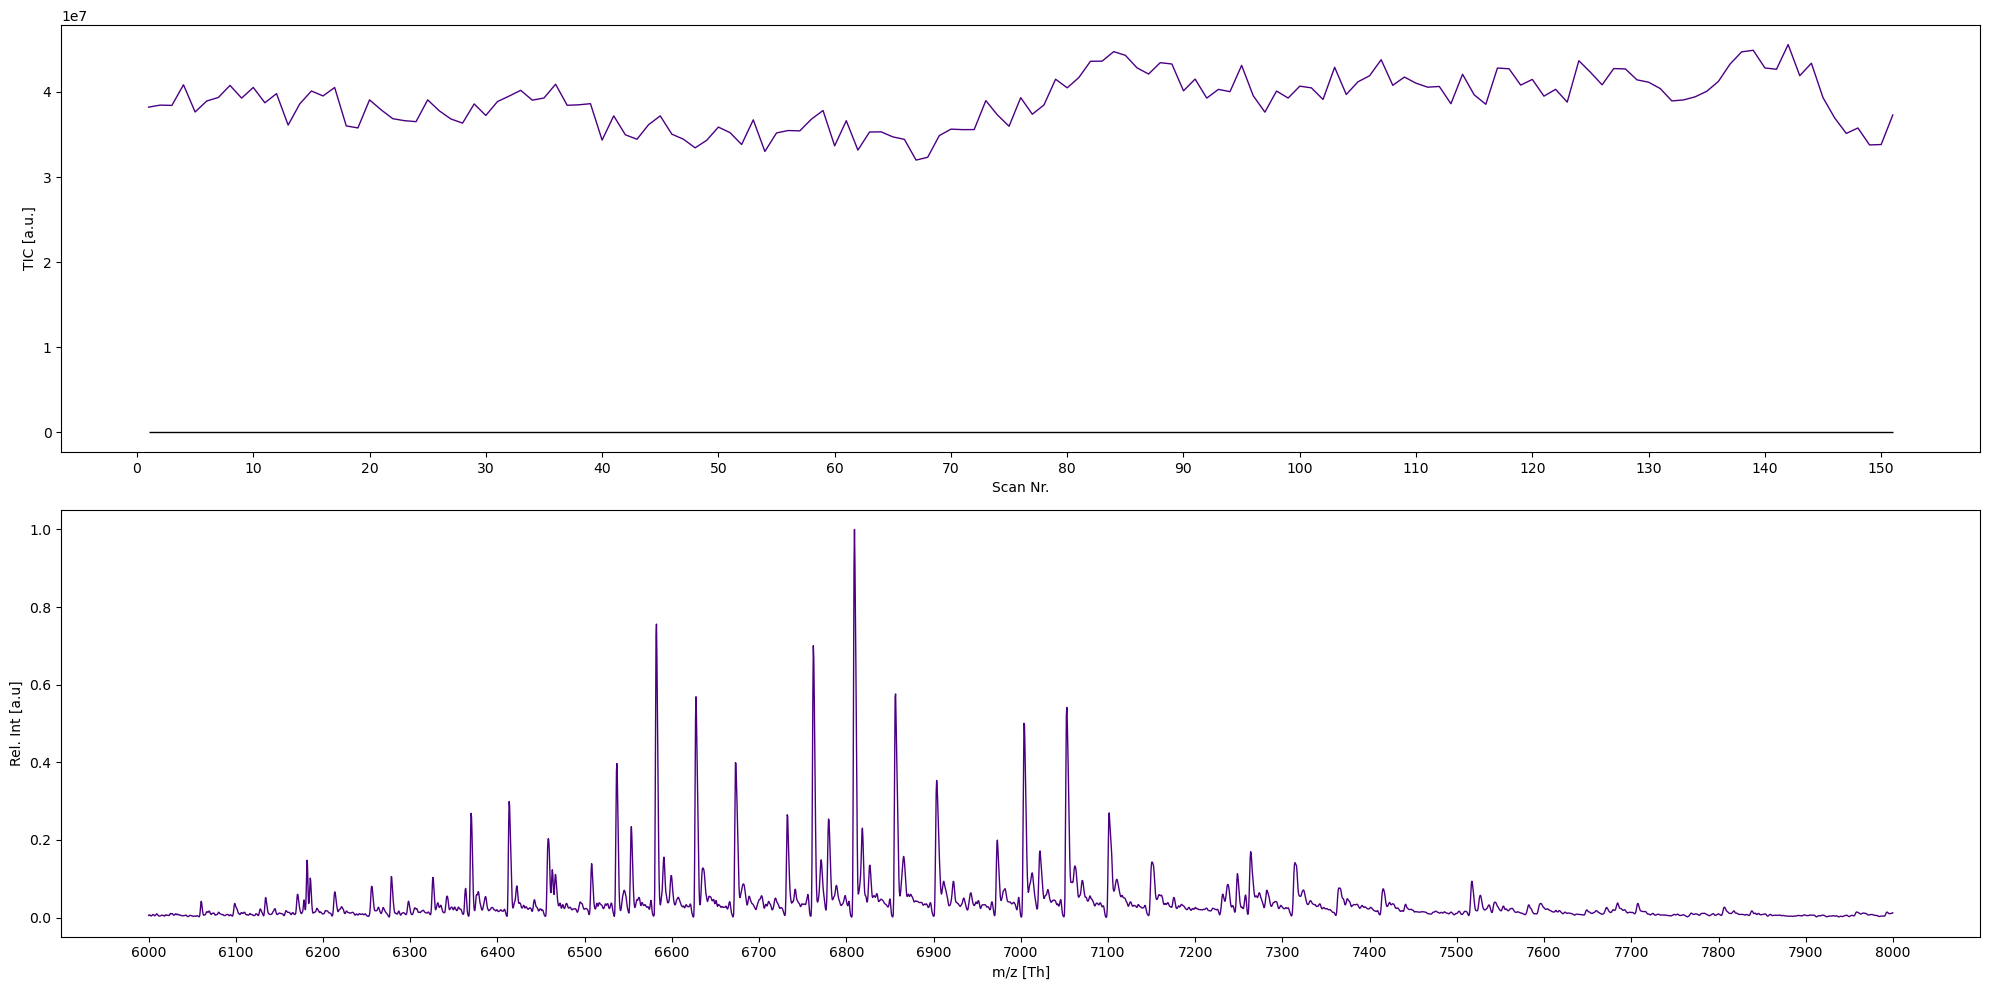

In [5]:
fig2,ax=plt.subplots(2,1, figsize=(20,10))
extractor.plot_chromatogram(plot_time=False,ax=ax[0])
extractor.plot_spectrum(zoom=[6000,8000],ax=ax[1])
fig2.tight_layout()
fig2.savefig(f"{folder}/spectrum_zoom.png",dpi=300)

In [6]:
unidec=UnidecInterface(
    data_in=glob(f"{folder}/*_selected_*")[0],
    folder_out=folder
)

unidec.run("config.txt")
unidec.load_results()
df=unidec.get_peak_df()


UniDec Engine v.6.0.4

UniDec Path: c:\Users\chem-chem1918\AppData\Local\miniconda3\envs\nativems\Lib\site-packages\unidec\bin\unidec.exe
Opening File:  ../../../Analyses/Proteasome/20241024/PA28ab_DMSO_1\20241023_PA28ab_DMSO2_1_selected__range_1-151.txt
Output Directory: c:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenbach\Analyses\Proteasome\20241024\PA28ab_DMSO_1
Loading Time: 0.21s
Data Prep Time: 0.17s
Automatic Peak Width: 2.76533
unidec run 1.7s
File Name:  ../../../Analyses/Proteasome/20241024/PA28ab_DMSO_1\20241023_PA28ab_DMSO2_1_selected__range_1-151.txt R Squared:  0.9432665492429381
R Squared: 0.9432665492429381
Average Peaks Score (UniScore): 0.6356935001566562
Exported data to c:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenbach\Analyses\Proteasome\20241024\PA28ab_DMSO_1\20241023_PA28ab_DMSO2_1_selected__range_1-151_unidec_chargedata.dat
Exported data to c:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrota

Mass,MassStdGuess,Area,MassCentroid,DScore
68980.0,39.1,4.1,68980.0,0.5
111650.0,59.0,5.3,111655.1,0.6
131820.0,60.5,3.9,131825.1,0.4
195210.0,80.4,15.3,195218.7,0.5
196080.0,80.0,60.9,196087.9,0.7
196580.0,80.7,16.8,196585.3,0.5
197450.0,80.9,100.0,197449.6,0.7
197700.0,81.6,17.9,197528.9,0.1
197930.0,83.4,8.7,197824.4,0.3
198810.0,81.6,62.1,198813.2,0.7


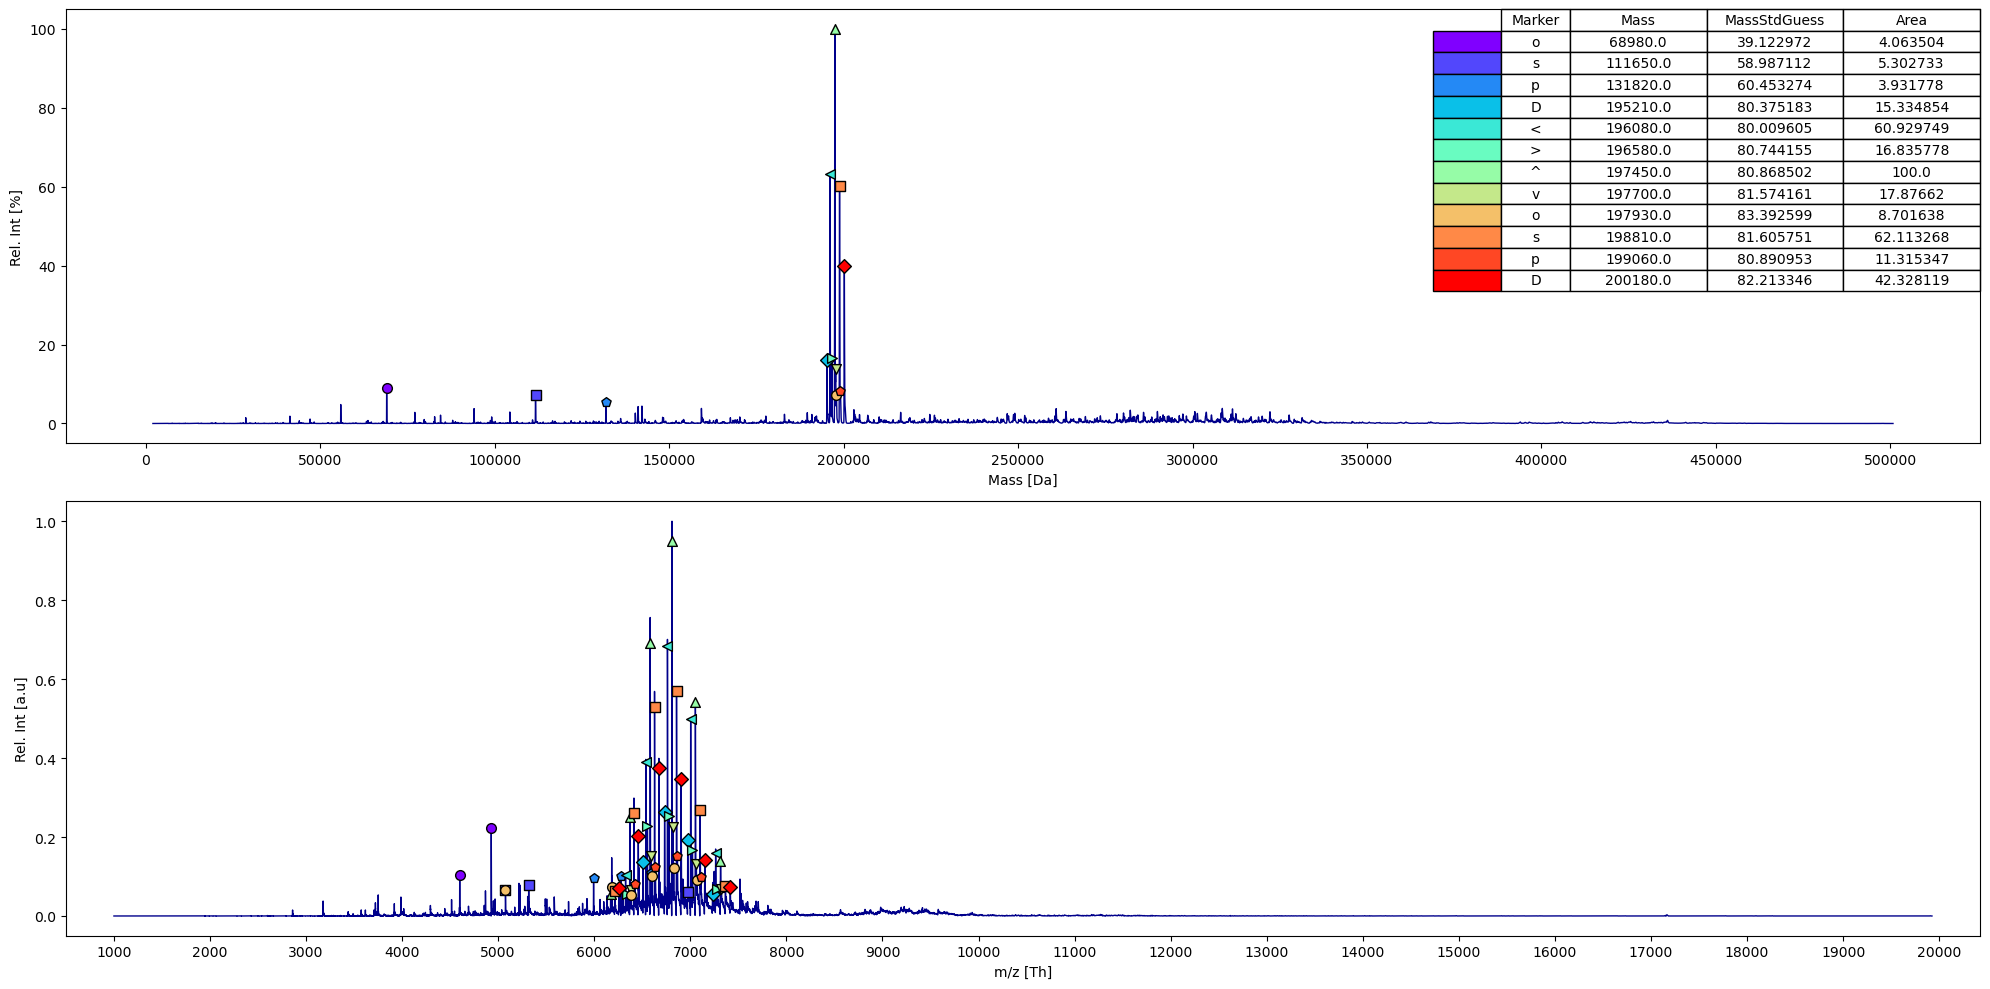

In [7]:
fig3,ax=plt.subplots(2,1, figsize=(20,10))
unidec.plot_mass_data(
    ax=ax[0],
    zoom=None
)
unidec.plot_mz_data(
    ax=ax[1],
    zoom=None,
    threshold=0.05
)

unidec.plot_table(ax[0])
fig3.tight_layout()
fig3.savefig(f"{folder}/unidec_results_wide.png",dpi=300)

df.drop(columns=["AvgCharge","StdDevCharge","Height","MassFWHM","MassErrorBetweenZ","Marker"]).style.hide(axis='index').format(precision=1)

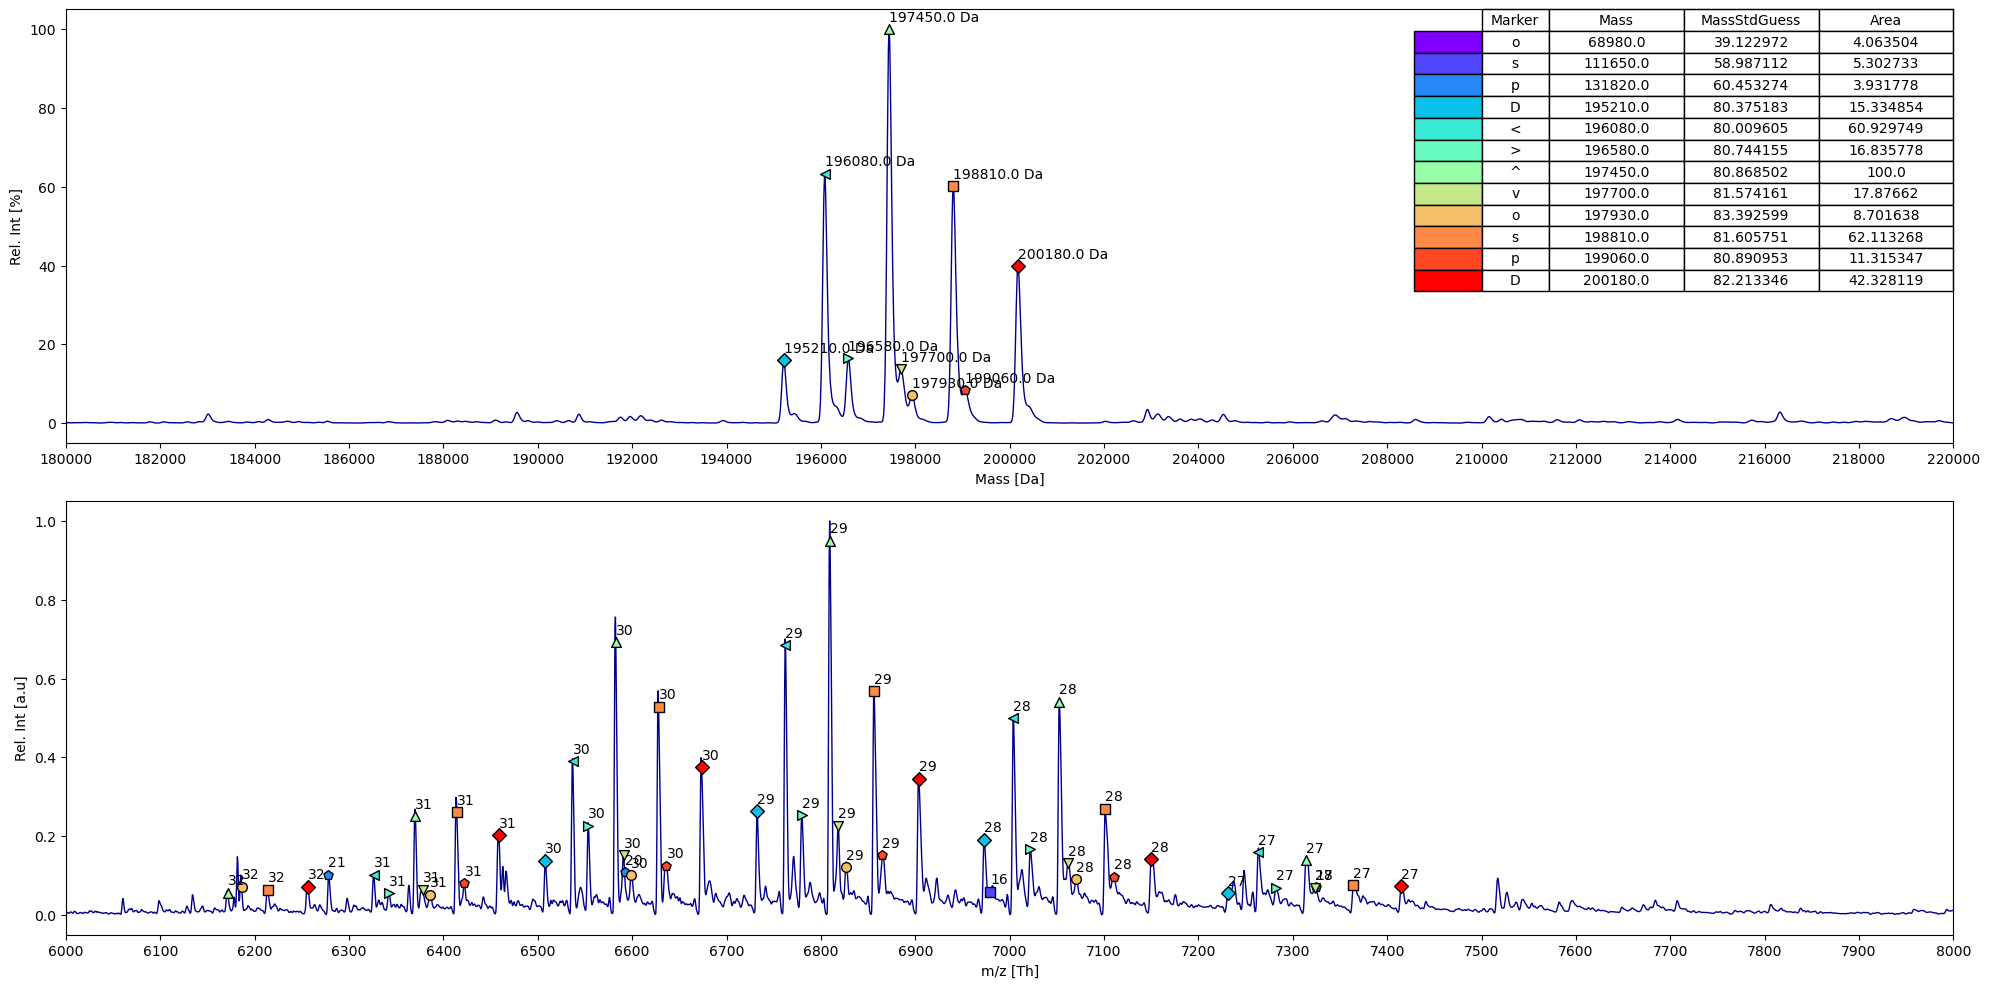

In [8]:
fig4,ax=plt.subplots(2,1, figsize=(20,10))
unidec.plot_mass_data(
    ax=ax[0],
    zoom=[180000,220000],
    display_masses=True
)
unidec.plot_mz_data(
    ax=ax[1],
    zoom=[6000,8000],
    threshold=0.05,
    display_charges=True
)

unidec.plot_table(ax[0])
fig4.tight_layout()
fig4.savefig(f"{folder}/unidec_results_zoom.png",dpi=300)


In [9]:
diffs=get_neighbour_diffs(df,window=2)

#diffs.loc[df["Ref_Peak_idx"]==10]
diffs

,Ref_Peak_idx,Ref_Peak_Marker,Peak_idx,Peak_Marker,Difference
0,0,o,0,o,0.0
1,0,o,1,s,42670.0
2,0,o,2,p,62840.0
3,1,s,0,o,42670.0
4,1,s,1,s,0.0
5,1,s,2,p,20170.0
6,1,s,3,D,83560.0
7,2,p,0,o,62840.0
8,2,p,1,s,20170.0
9,2,p,2,p,0.0


In [10]:
stoichiometries=get_stoichiometries(
    df=df,
    mass_array=[28592,27232],
    no_subunits=7,
    max_multiplicates=7
)

stoichiometries

,28592,27232,sum,diff,Mass_i,Mass
0,2.0,0.0,57184.0,11796.0,0.0,68980.0
1,2.0,2.0,111648.0,2.0,1.0,111650.0
2,0.0,5.0,136160.0,4340.0,2.0,131820.0
3,3.0,4.0,194704.0,506.0,3.0,195210.0
4,4.0,3.0,196064.0,16.0,4.0,196080.0
5,4.0,3.0,196064.0,516.0,5.0,196580.0
6,5.0,2.0,197424.0,26.0,6.0,197450.0
7,5.0,2.0,197424.0,276.0,7.0,197700.0
8,5.0,2.0,197424.0,506.0,8.0,197930.0
9,6.0,1.0,198784.0,26.0,9.0,198810.0
